In [1]:
!pip install -U keras-tuner

## Create a CNN model and tune it using keras-tuner

In [2]:
import keras_tuner
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical


In [3]:
# Load the dataset

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Normalize the data between [0,1]

train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
train_images[0].shape  # image shape -> Gray scale and 28*28 images

(28, 28)

In [7]:
train_images = train_images.reshape((len(train_images), 28, 28, 1))
test_images = test_images.reshape((len(test_images), 28, 28, 1))

In [8]:
# Buidling The model 

def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
            activation='relu',
            input_shape=(28,28,1)
        ),
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
            kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
            activation='relu',
            ),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('dense_1_units', min_value=32, max_value=512, step=32),
            activation='relu'
        ),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
    return model
    

In [11]:
# using randomsearch to find which problem statement is best suited for this problem statement

from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters



In [12]:
tuner_search = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='output', project_name='Mnist Fashion')

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
tuner_search.search(train_images,train_labels, epochs=3, validation_split=0.1)

Trial 5 Complete [00h 08m 43s]
val_accuracy: 0.8788333535194397

Best val_accuracy So Far: 0.8886666893959045
Total elapsed time: 00h 21m 54s


In [16]:
model = tuner_search.get_best_models(num_models=1)[0]
model.summary()

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 160)                 │       2,478,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,505,802 (9.56 MB)

 Trainable params: 2,505,802 (9.56 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(train_images, train_labels, epochs=10,validation_split=0.1, initial_epoch=4)

Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 115s 66ms/step - accuracy: 0.9000 - loss: 0.2719 - val_accuracy: 0.8902 - val_loss: 0.3011
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 107s 63ms/step - accuracy: 0.9130 - loss: 0.2355 - val_accuracy: 0.9037 - val_loss: 0.2586
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 101s 60ms/step - accuracy: 0.9228 - loss: 0.2115 - val_accuracy: 0.9083 - val_loss: 0.2480
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 99s 59ms/step - accuracy: 0.9305 - loss: 0.1939 - val_accuracy: 0.9130 - val_loss: 0.2420
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 98s 58ms/step - accuracy: 0.9373 - loss: 0.1712 - val_accuracy: 0.9062 - val_loss: 0.2604
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 99s 58ms/step - accuracy: 0.9439 - loss: 0.1557 - val_accuracy: 0.9138 - val_loss: 0.2442


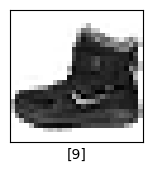

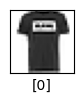

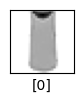

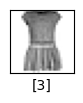

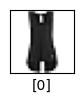

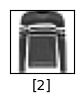

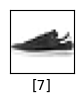

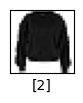

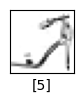

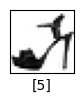

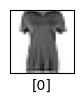

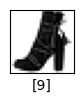

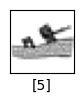

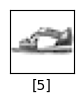

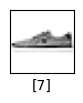

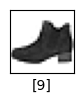

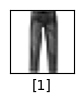

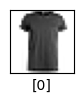

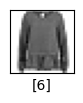

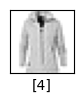

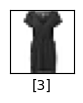

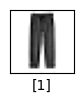

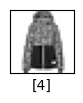

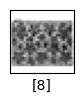

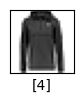

In [27]:
#show images
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel([labels[i]])
        plt.show()

#show images
show_images(train_images[0:25], train_labels[0:25])
        




In [33]:
#get names of features
# Define the class labels for Fashion MNIST
label_names = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]


In [43]:
# save the model in h5 format
model.save('fashion_mnist_cnn.h5')

In [45]:
import os
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from PIL import Image

# Create a directory to save the dataset
os.makedirs("data_mnist", exist_ok=True)

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Function to save images as .png files
def save_images(x_data, y_data, split):
    for i in range(len(x_data)):
        # Convert each image to PIL Image
        image = Image.fromarray(x_data[i])
        label = y_data[i]
        
        # Save the image in the directory with a label in the filename
        image.save(f"data_mnist/{split}_image_{i}_label_{label}.png")

# Save training images
save_images(x_train, y_train, 'train')

# Save testing images
save_images(x_test, y_test, 'test')

print("Fashion MNIST dataset images have been saved to the 'data_mnist' directory.")


Fashion MNIST dataset images have been saved to the 'data_mnist' directory.


In [47]:
import cv2  # OpenCV for image preprocessing
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model("fashion_mnist_cnn.h5")

# Define the class labels for Fashion MNIST
label_names = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]

# Preprocess the image for prediction
def preprocess_image(image_path):
    """
    Preprocess the input image for model prediction.
    Args:
        image_path (str): Path to the input image.
    Returns:
        np.array: Preprocessed image ready for prediction.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    img = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
    img = img / 255.0  # Normalize to [0, 1]
    img = img.reshape(1, 28, 28, 1)  # Add batch dimension
    return img

# Make a prediction
def predict_sample(model, image_path, label_names):
    """
    Predict the class of a given image using the trained model.
    Args:
        model: Trained model.
        image_path (str): Path to the input image.
        label_names (list): List of class names.
    Returns:
        tuple: Predicted class name and confidence score.
    """
    processed_img = preprocess_image(image_path)
    predictions = model.predict(processed_img)
    predicted_label = np.argmax(predictions)
    confidence = np.max(predictions)
    return label_names[predicted_label], confidence

# Sample image path (Replace with your sample image path)
sample_image_path = "data_mnist/test_image_37_label_5.png"

# Predict the class and confidence for the sample image
predicted_class, confidence = predict_sample(model, sample_image_path, label_names)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Sandal, Confidence: 1.00
